In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchaudio.transforms as T
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, DataLoader
import sys
from IPython.display import Audio
from IPython.core.display import display

C:\Users\ian\AppData\Local\Temp\ipykernel_10540\1821862771.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [189]:
dataset = torchaudio.datasets.SPEECHCOMMANDS('./audio', download=True)


In [190]:
dataset[0]


(tensor([[ 9.1553e-05,  3.0518e-05,  1.8311e-04,  ..., -3.0518e-05,
          -9.1553e-05,  1.2207e-04]]),
 16000,
 'bed',
 '00176480',
 0)

In [191]:
train_audio_path = './audio/SpeechCommands/speech_commands_v0.02/'
wav_file = train_audio_path+'happy/0ab3b47d_nohash_0.wav'

# 播放語音
Audio(wav_file, autoplay=False)

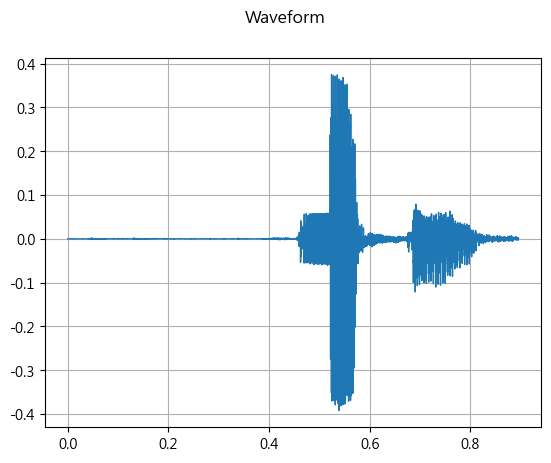

In [192]:
waveform, sample_rate = torchaudio.load(wav_file)
audio_util.plot_waveform(waveform, sample_rate)

In [193]:
waveform.shape


torch.Size([1, 14336])

In [194]:
sample_rate


16000

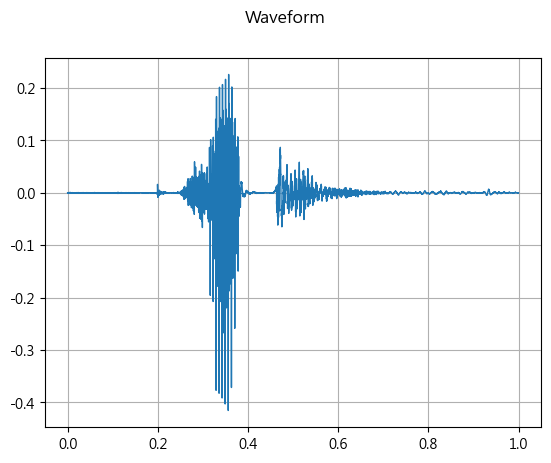

In [195]:
wav_file = train_audio_path+'happy/0b09edd3_nohash_0.wav'

# 播放語音
display(Audio(wav_file, autoplay=False))

# 繪製波形
waveform, sample_rate = torchaudio.load(wav_file)
audio_util.plot_waveform(waveform, sample_rate) 

In [196]:
waveform, sample_rate, label, speaker_id, utterance_number = dataset[0]
Audio(waveform, rate=sample_rate)

In [197]:
info = torchaudio.info(wav_file)
print(f'取樣率={info.sample_rate}, 幀數={info.num_frames}, ' +
      f'聲道={info.num_channels}, 精度={info.bits_per_sample}, ' +
      f'檔案秒數={info.num_frames / info.sample_rate:.2f}')

取樣率=16000, 幀數=16000, 聲道=1, 精度=16, 檔案秒數=1.00


In [198]:
waveform, sample_rate = torchaudio.load(wav_file)
resample_rate = 8000
resampled_waveform = torchaudio.functional.resample(
                        waveform, sample_rate, resample_rate)
print(f'幀數={resampled_waveform.shape[1]}')

幀數=8000


In [199]:
type(waveform)


torch.Tensor

In [200]:
labels=os.listdir(train_audio_path)
labels

['bed', 'cat', 'happy']

檔案數=[2014, 2031, 2054]


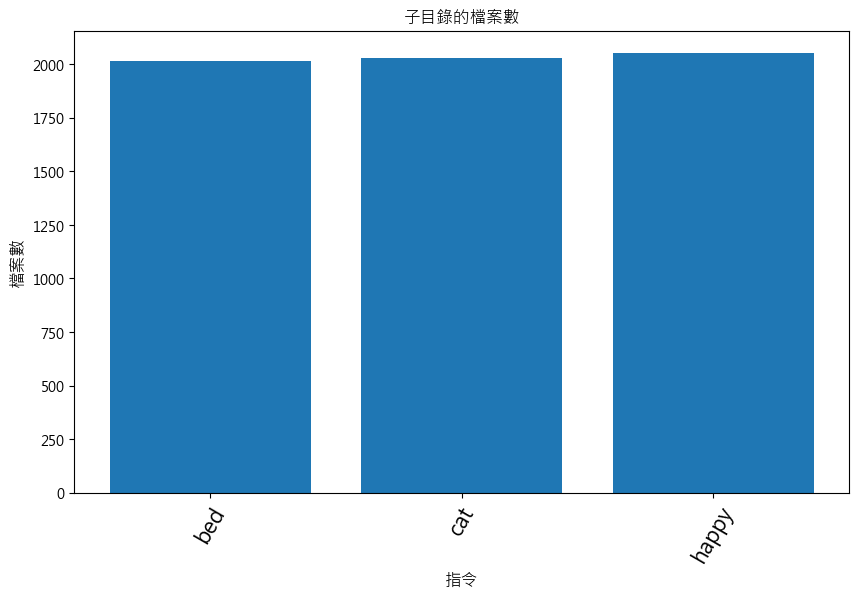

In [201]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) 
             if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('指令', fontsize=12)
plt.ylabel('檔案數', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('子目錄的檔案數')
print(f'檔案數={no_of_recordings}')
plt.show()

<AxesSubplot:ylabel='Count'>

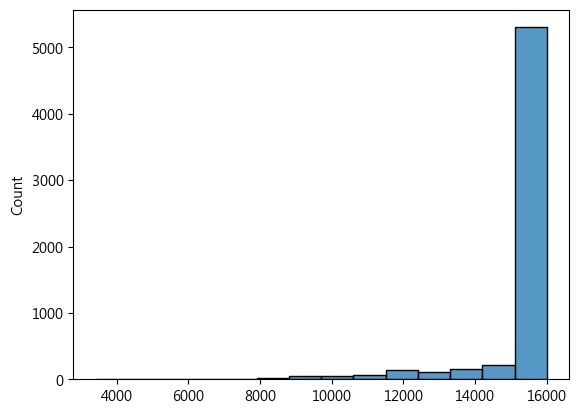

In [60]:
import seaborn as sns
length_list=[]
for x in dataset:
    waveform, sample_rate, label, speaker_id, utterance_number = x
    length_list.append(waveform.shape[1])
sns.histplot(length_list)

In [167]:
dataset = torchaudio.datasets.SPEECHCOMMANDS('./audio', download=True)


In [168]:
BATCH_SIZE = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

In [207]:
TOTAL_FRAME_COUNT = 16000
n_mfcc = 40
class SPEECH_DS(Dataset):
    def __init__(self, dataset1):
        self.dataset1 = dataset1
        
    def __len__(self):
          return len(self.dataset1)  

    def __getitem__(self, n):
        waveform , sample_rate, label, _, _ = self.dataset1[n]
        if waveform.shape[1] < TOTAL_FRAME_COUNT :
            waveform = F.pad(waveform,
                     (0, TOTAL_FRAME_COUNT-waveform.shape[1]),'constant')
        elif waveform.shape[1] > TOTAL_FRAME_COUNT :
            waveform = waveform[:, :TOTAL_FRAME_COUNT]
        if waveform.shape[1] != TOTAL_FRAME_COUNT:
            print(waveform.shape[1])
        
        mfcc_transform = T.MFCC(
            sample_rate=sample_rate,
            n_mfcc=n_mfcc,   
        )
        mfcc = mfcc_transform(waveform)
        return mfcc, labels.index(label)
    
dataset_new = SPEECH_DS(dataset)

In [208]:
dataset_new[0][0].shape


torch.Size([1, 40, 81])

In [209]:
dataset_new[0][0]


tensor([[[-5.8040e+02, -5.7552e+02, -5.7766e+02,  ..., -5.5747e+02,
          -5.6225e+02, -5.6538e+02],
         [ 5.2286e+00,  1.6873e+01,  1.8741e+01,  ...,  1.6690e+01,
           1.1457e+01,  2.0893e+01],
         [-4.3655e+00,  3.9004e+00,  3.8805e+00,  ...,  9.1251e+00,
          -1.7784e+00,  1.0627e+01],
         ...,
         [ 8.0960e+00, -2.7053e+00, -3.0202e+00,  ..., -5.0008e+00,
          -3.5156e+00, -4.3835e+00],
         [ 7.1245e-01,  1.2997e+00, -4.7095e+00,  ...,  5.2304e+00,
          -3.8770e-01,  2.3371e+00],
         [-3.9061e+00, -1.4976e+00, -3.0793e+00,  ..., -2.9170e+00,
           2.0787e+00,  7.2918e+00]]])

In [210]:
from torch.utils.data import random_split

test_size = int(len(dataset_new) * 0.2)
train_size = len(dataset_new) - test_size

train_ds, test_ds = random_split(dataset_new, [train_size, test_size])
len(train_ds), len(test_ds)

(4880, 1219)

In [211]:
train_loader = DataLoader(train_ds, BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, BATCH_SIZE*2, shuffle=False)

In [212]:
Linear_Input = 6400
class ConvNet(nn.Module):
    def __init__(self, num_classes=3):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(Linear_Input, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = F.log_softmax(out, dim=1)
        return out

model = ConvNet(num_classes=3).to(device)

In [213]:
def score_model():
    model.eval()
    test_loss = 0
    correct = 0
    prediction_list = []
    target_list = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            test_loss += F.nll_loss(output, target).item()            

            _, predicted = torch.max(output.data, 1)
            correct += (predicted == target).sum().item()
            prediction_list.extend(predicted.cpu().numpy())
            target_list.extend(target.cpu().numpy())

    test_loss /= len(test_loader.dataset) 
    batch = batch_idx * len(data)
    data_count = len(test_loader.dataset)
    percentage = 100. * correct / data_count 
    print(f'平均損失: {test_loss:.4f}, 準確率: {correct}/{data_count}' + 
          f' ({percentage:.2f}%)\n')
    return prediction_list, target_list

In [214]:
epochs = 10

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)  

model.train()
loss_list = []    
for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if (batch_idx+1) % 10 == 0:
            loss_list.append(loss.item())
            batch = (batch_idx+1) * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * (batch_idx+1) / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')
    score_model()
    scheduler.step()

Epoch 1: [   30 / 4880] (1 %)  Loss: 0.585296
Epoch 1: [   60 / 4880] (1 %)  Loss: 1.337326
Epoch 1: [   90 / 4880] (2 %)  Loss: 1.115502
Epoch 1: [  120 / 4880] (2 %)  Loss: 1.240697
Epoch 1: [  150 / 4880] (3 %)  Loss: 1.304374
Epoch 1: [  180 / 4880] (4 %)  Loss: 1.397518
Epoch 1: [  210 / 4880] (4 %)  Loss: 1.173975
Epoch 1: [  240 / 4880] (5 %)  Loss: 1.632206
Epoch 1: [  270 / 4880] (6 %)  Loss: 1.696619
Epoch 1: [  300 / 4880] (6 %)  Loss: 0.733552
Epoch 1: [  330 / 4880] (7 %)  Loss: 0.437309
Epoch 1: [  360 / 4880] (7 %)  Loss: 1.984255
Epoch 1: [  390 / 4880] (8 %)  Loss: 2.482570
Epoch 1: [  420 / 4880] (9 %)  Loss: 1.329802
Epoch 1: [  450 / 4880] (9 %)  Loss: 0.971211
Epoch 1: [  480 / 4880] (10 %)  Loss: 0.599493
Epoch 1: [  510 / 4880] (10 %)  Loss: 0.433918
Epoch 1: [  540 / 4880] (11 %)  Loss: 1.157791
Epoch 1: [  570 / 4880] (12 %)  Loss: 1.391280
Epoch 1: [  600 / 4880] (12 %)  Loss: 0.966410
Epoch 1: [  630 / 4880] (13 %)  Loss: 0.879193
Epoch 1: [  660 / 4880] (14 

Epoch 2: [  420 / 4880] (9 %)  Loss: 0.216290
Epoch 2: [  450 / 4880] (9 %)  Loss: 0.069026
Epoch 2: [  480 / 4880] (10 %)  Loss: 0.075517
Epoch 2: [  510 / 4880] (10 %)  Loss: 0.035623
Epoch 2: [  540 / 4880] (11 %)  Loss: 0.344818
Epoch 2: [  570 / 4880] (12 %)  Loss: 0.869517
Epoch 2: [  600 / 4880] (12 %)  Loss: 0.978070
Epoch 2: [  630 / 4880] (13 %)  Loss: 0.192016
Epoch 2: [  660 / 4880] (14 %)  Loss: 0.312856
Epoch 2: [  690 / 4880] (14 %)  Loss: 0.160862
Epoch 2: [  720 / 4880] (15 %)  Loss: 0.285177
Epoch 2: [  750 / 4880] (15 %)  Loss: 0.539545
Epoch 2: [  780 / 4880] (16 %)  Loss: 0.445765
Epoch 2: [  810 / 4880] (17 %)  Loss: 0.130482
Epoch 2: [  840 / 4880] (17 %)  Loss: 0.534106
Epoch 2: [  870 / 4880] (18 %)  Loss: 0.209925
Epoch 2: [  900 / 4880] (18 %)  Loss: 0.108659
Epoch 2: [  930 / 4880] (19 %)  Loss: 0.254349
Epoch 2: [  960 / 4880] (20 %)  Loss: 0.643660
Epoch 2: [  990 / 4880] (20 %)  Loss: 0.247200
Epoch 2: [ 1020 / 4880] (21 %)  Loss: 1.436461
Epoch 2: [ 1050

Epoch 3: [  780 / 4880] (16 %)  Loss: 0.052417
Epoch 3: [  810 / 4880] (17 %)  Loss: 0.055458
Epoch 3: [  840 / 4880] (17 %)  Loss: 0.892336
Epoch 3: [  870 / 4880] (18 %)  Loss: 0.069981
Epoch 3: [  900 / 4880] (18 %)  Loss: 0.044817
Epoch 3: [  930 / 4880] (19 %)  Loss: 0.136582
Epoch 3: [  960 / 4880] (20 %)  Loss: 0.079816
Epoch 3: [  990 / 4880] (20 %)  Loss: 0.079392
Epoch 3: [ 1020 / 4880] (21 %)  Loss: 0.755928
Epoch 3: [ 1050 / 4880] (22 %)  Loss: 0.000890
Epoch 3: [ 1080 / 4880] (22 %)  Loss: 0.017381
Epoch 3: [ 1110 / 4880] (23 %)  Loss: 0.003204
Epoch 3: [ 1140 / 4880] (23 %)  Loss: 0.038567
Epoch 3: [ 1170 / 4880] (24 %)  Loss: 0.211441
Epoch 3: [ 1200 / 4880] (25 %)  Loss: 0.723455
Epoch 3: [ 1230 / 4880] (25 %)  Loss: 0.058435
Epoch 3: [ 1260 / 4880] (26 %)  Loss: 0.106464
Epoch 3: [ 1290 / 4880] (26 %)  Loss: 0.234133
Epoch 3: [ 1320 / 4880] (27 %)  Loss: 0.005733
Epoch 3: [ 1350 / 4880] (28 %)  Loss: 0.102329
Epoch 3: [ 1380 / 4880] (28 %)  Loss: 0.262180
Epoch 3: [ 14

Epoch 4: [ 1140 / 4880] (23 %)  Loss: 0.034407
Epoch 4: [ 1170 / 4880] (24 %)  Loss: 0.026796
Epoch 4: [ 1200 / 4880] (25 %)  Loss: 0.711763
Epoch 4: [ 1230 / 4880] (25 %)  Loss: 0.024715
Epoch 4: [ 1260 / 4880] (26 %)  Loss: 0.088621
Epoch 4: [ 1290 / 4880] (26 %)  Loss: 0.184282
Epoch 4: [ 1320 / 4880] (27 %)  Loss: 0.004974
Epoch 4: [ 1350 / 4880] (28 %)  Loss: 0.318426
Epoch 4: [ 1380 / 4880] (28 %)  Loss: 0.091056
Epoch 4: [ 1410 / 4880] (29 %)  Loss: 0.004814
Epoch 4: [ 1440 / 4880] (30 %)  Loss: 0.000583
Epoch 4: [ 1470 / 4880] (30 %)  Loss: 0.000321
Epoch 4: [ 1500 / 4880] (31 %)  Loss: 0.178294
Epoch 4: [ 1530 / 4880] (31 %)  Loss: 0.001962
Epoch 4: [ 1560 / 4880] (32 %)  Loss: 0.021820
Epoch 4: [ 1590 / 4880] (33 %)  Loss: 0.000791
Epoch 4: [ 1620 / 4880] (33 %)  Loss: 0.013430
Epoch 4: [ 1650 / 4880] (34 %)  Loss: 0.002942
Epoch 4: [ 1680 / 4880] (34 %)  Loss: 0.013663
Epoch 4: [ 1710 / 4880] (35 %)  Loss: 0.075937
Epoch 4: [ 1740 / 4880] (36 %)  Loss: 0.010833
Epoch 4: [ 17

Epoch 5: [ 1530 / 4880] (31 %)  Loss: 0.000329
Epoch 5: [ 1560 / 4880] (32 %)  Loss: 0.022930
Epoch 5: [ 1590 / 4880] (33 %)  Loss: 0.000098
Epoch 5: [ 1620 / 4880] (33 %)  Loss: 0.002218
Epoch 5: [ 1650 / 4880] (34 %)  Loss: 0.005386
Epoch 5: [ 1680 / 4880] (34 %)  Loss: 0.003906
Epoch 5: [ 1710 / 4880] (35 %)  Loss: 0.019198
Epoch 5: [ 1740 / 4880] (36 %)  Loss: 0.002674
Epoch 5: [ 1770 / 4880] (36 %)  Loss: 0.025051
Epoch 5: [ 1800 / 4880] (37 %)  Loss: 0.941741
Epoch 5: [ 1830 / 4880] (37 %)  Loss: 0.277256
Epoch 5: [ 1860 / 4880] (38 %)  Loss: 0.111603
Epoch 5: [ 1890 / 4880] (39 %)  Loss: 0.045670
Epoch 5: [ 1920 / 4880] (39 %)  Loss: 0.005023
Epoch 5: [ 1950 / 4880] (40 %)  Loss: 0.033162
Epoch 5: [ 1980 / 4880] (41 %)  Loss: 0.002179
Epoch 5: [ 2010 / 4880] (41 %)  Loss: 0.033022
Epoch 5: [ 2040 / 4880] (42 %)  Loss: 0.058210
Epoch 5: [ 2070 / 4880] (42 %)  Loss: 0.000580
Epoch 5: [ 2100 / 4880] (43 %)  Loss: 0.070391
Epoch 5: [ 2130 / 4880] (44 %)  Loss: 0.000002
Epoch 5: [ 21

Epoch 6: [ 1950 / 4880] (40 %)  Loss: 0.013035
Epoch 6: [ 1980 / 4880] (41 %)  Loss: 0.000499
Epoch 6: [ 2010 / 4880] (41 %)  Loss: 0.002428
Epoch 6: [ 2040 / 4880] (42 %)  Loss: 0.220505
Epoch 6: [ 2070 / 4880] (42 %)  Loss: 0.005757
Epoch 6: [ 2100 / 4880] (43 %)  Loss: 0.105671
Epoch 6: [ 2130 / 4880] (44 %)  Loss: 0.000219
Epoch 6: [ 2160 / 4880] (44 %)  Loss: 0.152158
Epoch 6: [ 2190 / 4880] (45 %)  Loss: 0.136510
Epoch 6: [ 2220 / 4880] (45 %)  Loss: 0.048109
Epoch 6: [ 2250 / 4880] (46 %)  Loss: 0.000024
Epoch 6: [ 2280 / 4880] (47 %)  Loss: 0.008514
Epoch 6: [ 2310 / 4880] (47 %)  Loss: 0.029839
Epoch 6: [ 2340 / 4880] (48 %)  Loss: 0.114098
Epoch 6: [ 2370 / 4880] (49 %)  Loss: 0.000193
Epoch 6: [ 2400 / 4880] (49 %)  Loss: 0.026052
Epoch 6: [ 2430 / 4880] (50 %)  Loss: 0.000254
Epoch 6: [ 2460 / 4880] (50 %)  Loss: 0.000915
Epoch 6: [ 2490 / 4880] (51 %)  Loss: 0.193690
Epoch 6: [ 2520 / 4880] (52 %)  Loss: 0.005906
Epoch 6: [ 2550 / 4880] (52 %)  Loss: 0.000175
Epoch 6: [ 25

Epoch 7: [ 2340 / 4880] (48 %)  Loss: 0.005276
Epoch 7: [ 2370 / 4880] (49 %)  Loss: 0.000177
Epoch 7: [ 2400 / 4880] (49 %)  Loss: 0.016496
Epoch 7: [ 2430 / 4880] (50 %)  Loss: 0.001589
Epoch 7: [ 2460 / 4880] (50 %)  Loss: 0.003104
Epoch 7: [ 2490 / 4880] (51 %)  Loss: 0.848139
Epoch 7: [ 2520 / 4880] (52 %)  Loss: 0.357240
Epoch 7: [ 2550 / 4880] (52 %)  Loss: 0.000347
Epoch 7: [ 2580 / 4880] (53 %)  Loss: 0.000019
Epoch 7: [ 2610 / 4880] (53 %)  Loss: 0.000091
Epoch 7: [ 2640 / 4880] (54 %)  Loss: 0.024339
Epoch 7: [ 2670 / 4880] (55 %)  Loss: 0.000045
Epoch 7: [ 2700 / 4880] (55 %)  Loss: 0.000000
Epoch 7: [ 2730 / 4880] (56 %)  Loss: 0.000027
Epoch 7: [ 2760 / 4880] (57 %)  Loss: 0.000314
Epoch 7: [ 2790 / 4880] (57 %)  Loss: 0.022862
Epoch 7: [ 2820 / 4880] (58 %)  Loss: 0.000010
Epoch 7: [ 2850 / 4880] (58 %)  Loss: 0.077847
Epoch 7: [ 2880 / 4880] (59 %)  Loss: 0.000185
Epoch 7: [ 2910 / 4880] (60 %)  Loss: 0.115024
Epoch 7: [ 2940 / 4880] (60 %)  Loss: 0.006678
Epoch 7: [ 29

Epoch 8: [ 2760 / 4880] (57 %)  Loss: 0.000002
Epoch 8: [ 2790 / 4880] (57 %)  Loss: 0.001392
Epoch 8: [ 2820 / 4880] (58 %)  Loss: 0.000000
Epoch 8: [ 2850 / 4880] (58 %)  Loss: 0.056797
Epoch 8: [ 2880 / 4880] (59 %)  Loss: 0.000039
Epoch 8: [ 2910 / 4880] (60 %)  Loss: 0.151055
Epoch 8: [ 2940 / 4880] (60 %)  Loss: 0.001941
Epoch 8: [ 2970 / 4880] (61 %)  Loss: 0.110028
Epoch 8: [ 3000 / 4880] (61 %)  Loss: 0.001400
Epoch 8: [ 3030 / 4880] (62 %)  Loss: 0.060097
Epoch 8: [ 3060 / 4880] (63 %)  Loss: 0.000133
Epoch 8: [ 3090 / 4880] (63 %)  Loss: 0.231081
Epoch 8: [ 3120 / 4880] (64 %)  Loss: 0.000002
Epoch 8: [ 3150 / 4880] (65 %)  Loss: 0.000003
Epoch 8: [ 3180 / 4880] (65 %)  Loss: 0.952927
Epoch 8: [ 3210 / 4880] (66 %)  Loss: 0.369665
Epoch 8: [ 3240 / 4880] (66 %)  Loss: 0.007988
Epoch 8: [ 3270 / 4880] (67 %)  Loss: 0.000023
Epoch 8: [ 3300 / 4880] (68 %)  Loss: 0.012463
Epoch 8: [ 3330 / 4880] (68 %)  Loss: 2.094915
Epoch 8: [ 3360 / 4880] (69 %)  Loss: 0.000373
Epoch 8: [ 33

Epoch 9: [ 3150 / 4880] (65 %)  Loss: 0.000000
Epoch 9: [ 3180 / 4880] (65 %)  Loss: 0.000045
Epoch 9: [ 3210 / 4880] (66 %)  Loss: 0.262578
Epoch 9: [ 3240 / 4880] (66 %)  Loss: 0.000476
Epoch 9: [ 3270 / 4880] (67 %)  Loss: 0.000250
Epoch 9: [ 3300 / 4880] (68 %)  Loss: 0.001997
Epoch 9: [ 3330 / 4880] (68 %)  Loss: 0.725272
Epoch 9: [ 3360 / 4880] (69 %)  Loss: 0.000039
Epoch 9: [ 3390 / 4880] (69 %)  Loss: 0.002166
Epoch 9: [ 3420 / 4880] (70 %)  Loss: 0.000047
Epoch 9: [ 3450 / 4880] (71 %)  Loss: 0.046451
Epoch 9: [ 3480 / 4880] (71 %)  Loss: 0.000068
Epoch 9: [ 3510 / 4880] (72 %)  Loss: 0.000000
Epoch 9: [ 3540 / 4880] (73 %)  Loss: 0.000258
Epoch 9: [ 3570 / 4880] (73 %)  Loss: 0.000000
Epoch 9: [ 3600 / 4880] (74 %)  Loss: 0.000000
Epoch 9: [ 3630 / 4880] (74 %)  Loss: 0.009907
Epoch 9: [ 3660 / 4880] (75 %)  Loss: 0.000005
Epoch 9: [ 3690 / 4880] (76 %)  Loss: 0.000059
Epoch 9: [ 3720 / 4880] (76 %)  Loss: 0.004720
Epoch 9: [ 3750 / 4880] (77 %)  Loss: 0.001260
Epoch 9: [ 37

Epoch 10: [ 3510 / 4880] (72 %)  Loss: 0.000000
Epoch 10: [ 3540 / 4880] (73 %)  Loss: 0.000287
Epoch 10: [ 3570 / 4880] (73 %)  Loss: 0.000000
Epoch 10: [ 3600 / 4880] (74 %)  Loss: 0.000001
Epoch 10: [ 3630 / 4880] (74 %)  Loss: 0.425028
Epoch 10: [ 3660 / 4880] (75 %)  Loss: 0.000012
Epoch 10: [ 3690 / 4880] (76 %)  Loss: 0.000194
Epoch 10: [ 3720 / 4880] (76 %)  Loss: 0.003158
Epoch 10: [ 3750 / 4880] (77 %)  Loss: 0.000014
Epoch 10: [ 3780 / 4880] (77 %)  Loss: 0.045695
Epoch 10: [ 3810 / 4880] (78 %)  Loss: 1.464194
Epoch 10: [ 3840 / 4880] (79 %)  Loss: 0.000155
Epoch 10: [ 3870 / 4880] (79 %)  Loss: 0.198102
Epoch 10: [ 3900 / 4880] (80 %)  Loss: 0.001140
Epoch 10: [ 3930 / 4880] (81 %)  Loss: 0.000000
Epoch 10: [ 3960 / 4880] (81 %)  Loss: 0.013031
Epoch 10: [ 3990 / 4880] (82 %)  Loss: 0.000020
Epoch 10: [ 4020 / 4880] (82 %)  Loss: 0.001230
Epoch 10: [ 4050 / 4880] (83 %)  Loss: 0.182568
Epoch 10: [ 4080 / 4880] (84 %)  Loss: 0.000061
Epoch 10: [ 4110 / 4880] (84 %)  Loss: 0

In [215]:
score_model()


平均損失: 0.0465, 準確率: 1121/1219 (91.96%)



([1,
  0,
  0,
  1,
  2,
  1,
  1,
  0,
  1,
  1,
  2,
  2,
  0,
  0,
  1,
  2,
  1,
  1,
  0,
  1,
  0,
  0,
  2,
  2,
  0,
  1,
  1,
  0,
  0,
  2,
  0,
  1,
  2,
  2,
  1,
  1,
  0,
  2,
  1,
  0,
  2,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  2,
  2,
  2,
  0,
  2,
  1,
  1,
  2,
  2,
  1,
  0,
  1,
  0,
  2,
  0,
  1,
  1,
  2,
  0,
  0,
  1,
  2,
  2,
  2,
  0,
  1,
  0,
  2,
  2,
  1,
  0,
  1,
  1,
  1,
  2,
  0,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  2,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  2,
  0,
  2,
  2,
  0,
  1,
  0,
  0,
  1,
  0,
  2,
  0,
  1,
  0,
  1,
  0,
  2,
  0,
  1,
  2,
  2,
  2,
  0,
  2,
  0,
  1,
  2,
  1,
  0,
  2,
  2,
  1,
  2,
  2,
  0,
  2,
  1,
  1,
  2,
  1,
  1,
  0,
  2,
  2,
  1,
  0,
  0,
  2,
  2,
  0,
  0,
  0,
  2,
  0,
  2,
  1,
  2,
  1,
  1,
  1,
  2,
  1,
  1,
  2,
  0,
  2,
  1,
  0,
  0,
  0,
  2,
  1,
  2,
  2,
  0,
  1,
  2,
  0,
  2,
  2,
  2,
  1,
  2,
  1,
  1,
  2,
  2,
  1,
  0,
  2,
  2,


In [221]:
def predict(wav_file):
    waveform , sample_rate = torchaudio.load(wav_file)
    
    if waveform.shape[1] < TOTAL_FRAME_COUNT: # 長度不足，右邊補 0
        waveform = F.pad(waveform,(0, 
                   TOTAL_FRAME_COUNT-waveform.shape[1]),'constant')
    elif waveform.shape[1] > TOTAL_FRAME_COUNT: # 長度過長則截斷
        waveform = waveform[:, :TOTAL_FRAME_COUNT]
    if waveform.shape[1] != TOTAL_FRAME_COUNT:
        print(waveform.shape[1])

    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,   # MFCC 個數
    )
    mfcc = mfcc_transform(waveform)
    mfcc = mfcc.reshape(1,*mfcc.shape)
    
    # 預測
    output = model(mfcc.to(device))
    _, predicted = torch.max(output.data, 1)
    return predicted.cpu().item()

In [222]:
predict(train_audio_path+'bed/0d2bcf9d_nohash_0.wav')


0

In [225]:
predict('./audio/happy.wav')


2